<a href="https://colab.research.google.com/github/sordenesf/predicciones-de-ventas/blob/main/Proyecto_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1 - Base



Se parte montando unidad de Drive para la carga de la data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

file = '/content/drive/MyDrive/Coding Dojo/Week 1/sales_predictions_2023.csv'
df = pd.read_csv(file)

Se muestran las 10 primeras filas del dataframe

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Se muestran las últimas 10 filas del dataframe

In [4]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# Parte 2 - Limpieza de datos

1) ¿Cuántas filas y columnas hay?

In [5]:
df.shape

(8523, 12)

2) ¿Cuáles son los tipos de datos de cada variable?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, elimínelos.

In [7]:
df.duplicated().sum()

0

No se identifican duplicados, por lo tanto, no se hace tratamiento para este tipo de situación

4) Identifique los valores faltantes.

Total de valores faltantes por cada una de las columnas del dataframe:

In [8]:

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

El porcentaje de los valores faltantes respecto al total de cada columna es el siguiente:

In [9]:
df.isna().sum()*100/df.shape[0]

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Se detectan datos faltantes en las columnas 'Item_Weight' y en 'Outlet_Size'. En el caso de la columna 'Item_Weight', los datos son de tipo float64 y corresonden a un 17,16% del total de la columnas. Por otra parte, 'Outlet_Size' tien un 28,27% de datos faltantes y que son del tipo object

5) Decida qué hacer con los valores faltantes y cómo hacerlo. (Esto requiere de su criterio, así que explique cada elección).

Debido a la gran porcentaje de datos faltantes (superior al 2%), se buscará la forma de completar los datos en virtud del resto de los datos. Para ello, primero se realizará el análisis de la variable 'Outlet_Size que es del tipo categórica:

Se crea un filtro de los datos nulos en de la columna 'Oulet_size' para filtrar los datos nulos cuando sea pertinente:

In [10]:
filtro_na_outlet = df['Outlet_Size'].isna()

Según la documentación, la columna Outlet_Size está asocida a una entidad superior (Outlet), por lo cual, se seleccionan otras columnas del dataframe que estén relacionadas con Oulets. Esto con la finalidad de buscar posibles relaciones:

In [11]:
outlet_columns = ['Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type' ]

Datos nulos en variable 'Outlet_Identifier':

In [12]:
df[filtro_na_outlet].groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].count()*100/df.shape[0]

Outlet_Identifier
OUT010     6.511792
OUT017    10.864719
OUT045    10.899918
Name: Item_Outlet_Sales, dtype: float64

Datos nulos en variable 'Outlet_Establishment_Year':

In [13]:
df[filtro_na_outlet].groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].count()*100/df.shape[0]

Outlet_Establishment_Year
1998     6.511792
2002    10.899918
2007    10.864719
Name: Item_Outlet_Sales, dtype: float64

Datos nulos en variable 'Outlet_Location_Type':

In [14]:
df[filtro_na_outlet].groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].count()*100/df.shape[0]

Outlet_Location_Type
Tier 2    21.764637
Tier 3     6.511792
Name: Item_Outlet_Sales, dtype: float64

Datos nulos en variable 'Outlet_Type':

In [15]:
df[filtro_na_outlet].groupby(['Outlet_Type'])['Item_Outlet_Sales'].count()*100/df.shape[0]

Outlet_Type
Grocery Store         6.511792
Supermarket Type1    21.764637
Name: Item_Outlet_Sales, dtype: float64

Se observa que en las columnas 'Outlet_Identifier' y 'Outlet_Establishment_Year', los porcentajes se encuentran en dos categorías y son los mismos en ambas columnas. En forma análoga, los porcentajes en 'Outlet_Location_Type' y en 'Outlet_Type' se dividen en 3 categorías y en las dos columnas son los mismos. Con esta información, se sospecha que los datos nulos se encuentran en unas pocas categorías.

A continuación, se agrupan (suma de Item_Outlet_Sales) los datos ocupando las 4 columnas 'Outlet' que no tienen datos nulos:

In [16]:
df[filtro_na_outlet].groupby(outlet_columns)[['Item_Outlet_Sales']].sum().round(0)

,,,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,
OUT010,1998,Tier 3,Grocery Store,188340.0
OUT017,2007,Tier 2,Supermarket Type1,2167465.0
OUT045,2002,Tier 2,Supermarket Type1,2036725.0


De la tabla anterior, se obseva que los datos nulos pertenecen específicamente a 3 Outlets, identificados como OUT010, OUT017 y OUT045.

Se agrupan mediante suma los registros que **no tienen** datos faltantes en la columna 'Outlet_Size'

In [17]:
outlet_columns.append('Outlet_Size')

In [18]:
df.groupby(outlet_columns)[['Item_Outlet_Sales']].sum().round(0)

,,,,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size,
OUT013,1987,Tier 3,Supermarket Type1,High,2142664.0
OUT018,2009,Tier 3,Supermarket Type2,Medium,1851823.0
OUT019,1985,Tier 1,Grocery Store,Small,179694.0
OUT027,1985,Tier 3,Supermarket Type3,Medium,3453926.0
OUT035,2004,Tier 2,Supermarket Type1,Small,2268123.0
OUT046,1997,Tier 1,Supermarket Type1,Small,2118395.0
OUT049,1999,Tier 1,Supermarket Type1,Medium,2183970.0


En base a las tablas anteriores, se aplicarán los siguientes criterios para completar valores faltantes en la columna 'Outlet_Size':

- No existen filas de 'Outlet_Identifier' que no sean nulos y que permitan imputar el tamaño a las filas que sí lo son (OUT010, OUT017, OUT045)

- **No** se evidencia alguna relación relevante de la columna 'Outlet_Establishment_Year' con respecto al tamaño del outlet, motivo por el que los criterios serán establecidos principalmente con el resto de las columnas

- De todos los tipos de outlets, el outlet OUT013 es el único de tipo 'Grocery Store', siendo de tamaño Small. Además, sus ventas son bastante bajas comparadas a los otros outlets. Ambas condiciones se cumplen en el outlet OUT010, por ende, será considerado tipo Small

- Los outlets OUT017 y OUT045 son tipo 'Supermarket Type1' y ubicados en 'Tier 2', con ventas muy similares. De los outlets que no tienen nulos, solo uno (OUT035) está localizado en 'Tier 2' y es de tipo Small.

- Complementando el punto anterior, si analizamos la categoría 'Outlet_Type', cuando el outlet es tipo 'Supermarket Type1' se pueden encontrar de los 3 tamaños. No obstante, si miramos las ventas, vemos que las ventas de OUT017 y OUT045 son similares a OUT046 (tamaño Small), además de ser inaugurados en fechas cercanas.  

- Teniendo como base los 2 puntos anteriores, OUT017 y OUT045 será considerados Small. A pesar de tener cierto ruido en esta asignación, se prefiere introducir cierto error en la columna 'Outlet_Size' a perder más de un 20% de los registros.

In [19]:
df.groupby(['Outlet_Location_Type','Outlet_Size','Outlet_Identifier'])[['Item_Outlet_Sales']].sum().round(0)

Item_Outlet_Sales
Outlet_Location_Type Outlet_Size Outlet_Identifier                   
Tier 1               Medium      OUT049                     2183970.0
                     Small       OUT019                      179694.0
                                 OUT046                     2118395.0
Tier 2               Small       OUT035                     2268123.0
Tier 3               High        OUT013                     2142664.0
                     Medium      OUT018                     1851823.0
                                 OUT027                     3453926.0

In [20]:
resumen= df.groupby(['Outlet_Type','Outlet_Size','Outlet_Identifier'])[['Item_Outlet_Sales']].sum().round(0)
resumen.sort_values(by='Item_Outlet_Sales', ascending=True)

Item_Outlet_Sales
Outlet_Type       Outlet_Size Outlet_Identifier                   
Grocery Store     Small       OUT019                      179694.0
Supermarket Type2 Medium      OUT018                     1851823.0
Supermarket Type1 Small       OUT046                     2118395.0
                  High        OUT013                     2142664.0
                  Medium      OUT049                     2183970.0
                  Small       OUT035                     2268123.0
Supermarket Type3 Medium      OUT027                     3453926.0

Se realizan los cambios y se comprueba:

In [21]:
df['Outlet_Size']= df['Outlet_Size'].fillna('Small')
df.groupby(['Outlet_Identifier','Outlet_Size'])[['Item_Outlet_Sales']].sum().round(0)


,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,
OUT010,Small,188340.0
OUT013,High,2142664.0
OUT017,Small,2167465.0
OUT018,Medium,1851823.0
OUT019,Small,179694.0
OUT027,Medium,3453926.0
OUT035,Small,2268123.0
OUT045,Small,2036725.0
OUT046,Small,2118395.0


In [22]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Ahora, se analizarán los datos de la columna 'Item_Weight'

Se crea un filtro de valores nulos en la columna 'Item_Weight'

In [23]:
filtro_na_weight = df['Item_Weight'].isna()


Se detecta que 'Item_Fat_Content' tiene datos inconsistentes, por lo que se tratan antes de continuar

In [24]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Se crea un diccionario para datos inconsistentes:

In [25]:
dict_item_fat_content = {'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}

Se procede con el cambio y se verifican los valores:

In [26]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace(dict_item_fat_content)
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

**De la documentación, se sabe que cada producto se corresponde con un único Identificador. Por lo tanto, para los productos con peso nulo, se buscará en otras filas la existencia del mismo Identificador que tengan registrado su peso:**

In [27]:
agrupacion = df.groupby(['Item_Identifier'])[['Item_Weight']].mean()

Se crea un diccionario para reemplazar valores nulos:

In [28]:
llaves = agrupacion.index
valores = agrupacion.values.ravel() #ravel para quitar una dimension del array
diccionario = dict(zip(llaves,valores))
diccionario

{'DRA12': 11.6,
 'DRA24': 19.35,
 'DRA59': 8.27,
 'DRB01': 7.39,
 'DRB13': 6.115,
 'DRB24': 8.785,
 'DRB25': 12.3,
 'DRB48': 16.75,
 'DRC01': 5.92,
 'DRC12': 17.85,
 'DRC13': 8.26,
 'DRC24': 17.85,
 'DRC25': 5.73,
 'DRC27': 13.800000000000002,
 'DRC36': 13.0,
 'DRC49': 8.67,
 'DRD01': 12.1,
 'DRD12': 6.96,
 'DRD13': 15.0,
 'DRD15': 10.6,
 'DRD24': 13.85,
 'DRD25': 6.135000000000001,
 'DRD27': 18.75,
 'DRD37': 9.8,
 'DRD49': 9.895,
 'DRD60': 15.7,
 'DRE01': 10.1,
 'DRE03': 19.6,
 'DRE12': 4.59,
 'DRE13': 6.28,
 'DRE15': 13.35,
 'DRE25': 15.35,
 'DRE27': 11.85,
 'DRE37': 13.5,
 'DRE48': 8.43,
 'DRE49': 20.75,
 'DRE60': 9.395,
 'DRF01': 5.655,
 'DRF03': 19.1,
 'DRF13': 12.1,
 'DRF15': 18.35,
 'DRF23': 4.61,
 'DRF25': 9.0,
 'DRF27': 8.93,
 'DRF36': 16.1,
 'DRF37': 17.25,
 'DRF48': 5.73,
 'DRF49': 7.269999999999999,
 'DRF51': 15.75,
 'DRF60': 10.8,
 'DRG01': 14.800000000000002,
 'DRG03': 14.5,
 'DRG11': 6.385,
 'DRG13': 17.25,
 'DRG15': 6.13,
 'DRG23': 8.88,
 'DRG25': 10.5,
 'DRG27': 8.895,

Se crea un diccionario para rellenar cada valor nulo con el encontrado en la agrupación anterior:

In [29]:
for llave,valor in diccionario.items():
  filtro = df['Item_Identifier']== llave
  df.loc[filtro_na_weight & filtro, ['Item_Weight']] = df.loc[filtro_na_weight & filtro, ['Item_Weight']].fillna(valor)

Se comprueban los valores faltantes:

In [30]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Aún quedan valores nulos. Se buscará imputar mendiante otra variable asociada**

De la documentación, variables que se encuentran asociadas al peso de un producto son el 'tipo del producto' como también su 'contenido de grasa'. La visibilidad del mismo y el precio de lista no afectan directamente al peso.

Agrupamos los datos por contenido de grasa y por tipo de producto, obteniendo estádisticas resumen mediante la variable 'Item_Weight':

In [31]:
filtro_na_weight = df['Item_Weight'].isna() # Se actualiza el filtro de nulos

In [32]:
df[filtro_na_weight].groupby(['Item_Identifier','Item_Type','Item_Fat_Content'])[['Item_Identifier']].agg('count')

,,,Item_Identifier
Item_Identifier,Item_Type,Item_Fat_Content,
FDE52,Dairy,Regular,1
FDK57,Snack Foods,Low Fat,1
FDN52,Frozen Foods,Regular,1
FDQ60,Baking Goods,Regular,1


Existen 4 productos que tienen al menos un registro sin su peso

Se buscan estádisticos generales de 'Item_Weight':

In [33]:
df[['Item_Weight']].agg(['min','max','median','mean','std'])

,Item_Weight
min,4.555000
max,21.350000
median,12.650000
mean,12.875420
std,4.646098


Ahora, se determinan estadísticos del peso del producto, pero agrupados por por el contenido de grasa:

In [34]:
df.groupby('Item_Fat_Content')[['Item_Weight']].agg(['min','max','median','mean','std'])

Item_Weight                                  
                         min    max median      mean       std
Item_Fat_Content                                              
Low Fat                4.590  21.35   12.8  12.96728  4.652743
Regular                4.555  21.20   12.5  12.70669  4.629896

Por otra parte, el peso se agrupa mediante el tipo de producto

In [35]:
df.groupby('Item_Type')[['Item_Weight']].agg(['min','max','median','mean','std'])

Item_Weight                                     
                              min    max   median       mean       std
Item_Type                                                             
Baking Goods                4.880  20.85  11.6500  12.285317  4.749789
Breads                      4.635  20.85  10.6000  11.297689  4.479814
Breakfast                   6.425  21.10  10.6950  12.779727  4.979703
Canned                      4.615  21.35  12.3500  12.403320  4.636247
Dairy                       4.805  20.70  13.3500  13.379905  4.699321
Frozen Foods                4.555  20.85  12.8500  12.782404  4.480479
Fruits and Vegetables       5.460  21.35  13.1000  13.236713  4.580452
Hard Drinks                 4.610  19.70   9.8975  11.456238  4.290768
Health and Hygiene          5.175  21.25  12.1500  13.052327  4.475660
Household                   5.030  21.25  13.5000  13.524780  5.001001
Meat                        5.150  21.25  12.3500  12.771212  4.611895
Others                      5.500  20.50  14.5000  13.979438  4.157975
Seafood                     5.365  20.75  11.6500  12.521953  5.363283
Snack Foods                 5.095  21.25  13.1500  13.031230  4.525416
Soft Drinks                 4.590  20.75  11.8000  11.879775  4.463257
Starchy Foods               6.695  21.20  13.5000  13.841385  4.123740

Como se observa de las 3 tablas, se comenta lo siguiente:

- Los estadísticos al agrupar por contenido de grasa son prácticamente los mismos a los que se obtienen de la variable Item_Weight en forma general (sin usar groupby).

- Al agrupar por Item_Type, cada una de los categorías tiene variaciones respecto a los estísticos de la variable peso.

Por este motivo, se imputarán los valores nulo según el promedio de cada categoría de la variable 'Item_Type'

In [36]:
agrupacion = df.groupby('Item_Type')[['Item_Weight']].mean()
agrupacion

,Item_Weight
Item_Type,
Baking Goods,12.285317
Breads,11.297689
Breakfast,12.779727
Canned,12.403320
Dairy,13.379905
Frozen Foods,12.782404
Fruits and Vegetables,13.236713
Hard Drinks,11.456238
Health and Hygiene,13.052327


Se genera un diccionario donde la llave corresponde al tipo de producto y el respectivo valor será el promedio obtenido

In [37]:
llaves = agrupacion.index
valores = agrupacion.values.ravel() #ravel para quitar una dimension del array
diccionario = dict(zip(llaves,valores))
diccionario

{'Baking Goods': 12.28531684698609,
 'Breads': 11.29768924302789,
 'Breakfast': 12.779727272727273,
 'Canned': 12.403320493066255,
 'Dairy': 13.379904552129222,
 'Frozen Foods': 12.78240350877193,
 'Fruits and Vegetables': 13.236712662337663,
 'Hard Drinks': 11.45623831775701,
 'Health and Hygiene': 13.052326923076922,
 'Household': 13.52478021978022,
 'Meat': 12.771211764705884,
 'Others': 13.979437869822485,
 'Seafood': 12.521953125,
 'Snack Foods': 13.031230191826522,
 'Soft Drinks': 11.879775280898876,
 'Starchy Foods': 13.841385135135136}

Ciclo for para asignar a cada valor nulo (incluidos en filtro_na_weight) el promedio del peso correspondiente a su categoría 'Item_Type'

In [38]:
for llave,valor in diccionario.items():
  filtro = df['Item_Type']== llave
  df.loc[filtro_na_weight & filtro, ['Item_Weight']] = df.loc[filtro_na_weight & filtro, ['Item_Weight']].fillna(valor)

6) Confirme que no hay valores faltantes después de tratarlos.

In [39]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentre y arregle cualquier categoría inconsistente en los datos (ejemplo: arreglar los datos gato, Gato y Gatos de manera que sean consistentes)

En el punto 6) se encontró que 'Item_Far_Content' tenía datos inconsistentes, los cuales fueron abordados para el tratamiento de datos nulos. Se muestra que ahora hay solo 2 categorías:

In [40]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

8) Para cualquier columna numérica, obtenga las estadísticas resumidas de cada una (mínimo, máximo y media)

In [41]:
df.describe().loc[['min','max','mean'],:]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,12.875418,0.066132,140.992782,1997.831867,2181.288914


# Parte 3 - Visualizaciones

Se importan librerías escenciales:

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

Histograma para ver las distribuciones de las diversas características en el conjunto de datos.

Text(0.5, 1.0, 'Histograma de Item_Weight')

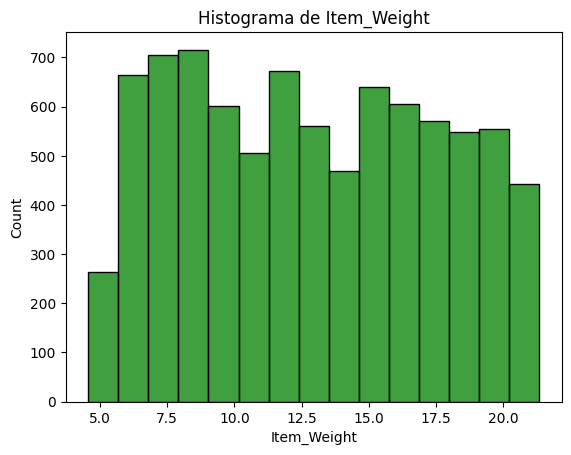

In [43]:
sns.histplot(x='Item_Weight', data=df, bins=15, color='g')
plt.title('Histograma de Item_Weight')

Text(0.5, 1.0, 'Histograma de Item_Visibility')

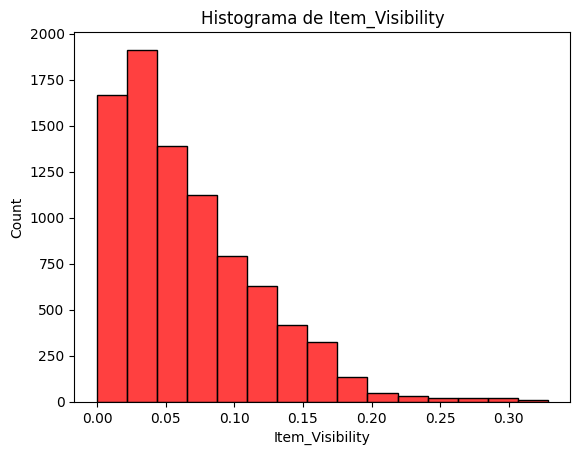

In [44]:
sns.histplot(x='Item_Visibility', data=df, bins=15, color='r')
plt.title('Histograma de Item_Visibility')

Text(0.5, 1.0, 'Histograma de Item_MRP')

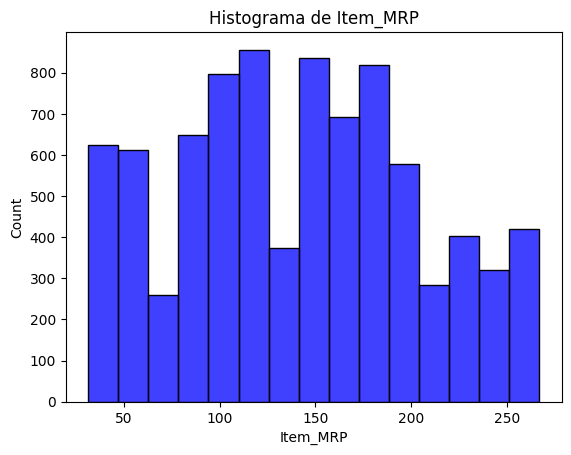

In [45]:
sns.histplot(x='Item_MRP', data=df, bins=15, color='b')
plt.title('Histograma de Item_MRP')

Text(0.5, 1.0, 'Histograma de Outlet_Establishment_Year')

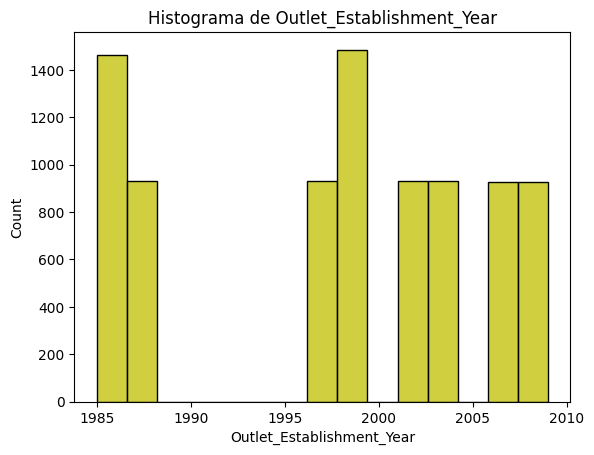

In [46]:
sns.histplot(x='Outlet_Establishment_Year', data=df, bins=15, color='y')
plt.title('Histograma de Outlet_Establishment_Year')

Text(0.5, 1.0, 'Histograma de Item_Outlet_Sales')

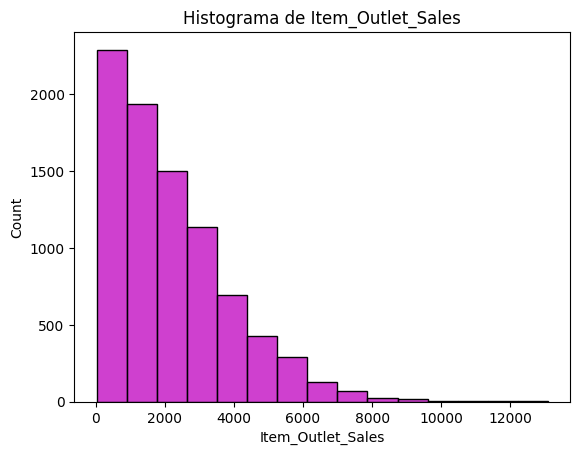

In [47]:
sns.histplot(x='Item_Outlet_Sales', data=df, bins=15, color='m')
plt.title('Histograma de Item_Outlet_Sales')

Boxplot para ver resúmenes estadísticos de diversas características del conjunto de datos.

Text(0.5, 1.0, 'Boxplot de Item_Weight')

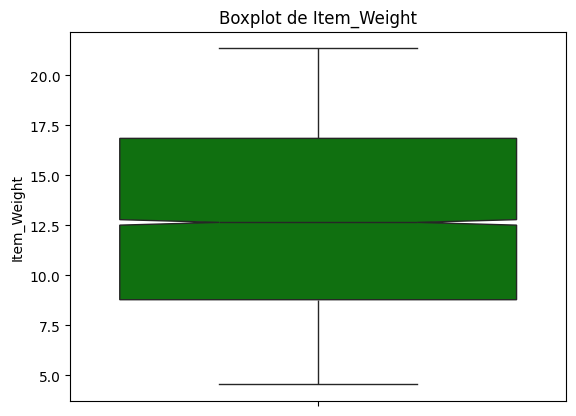

In [48]:
sns.boxplot(y='Item_Weight', data=df, color='g', notch=True)
plt.title('Boxplot de Item_Weight')

Text(0.5, 1.0, 'Boxplot de Item_Visibility')

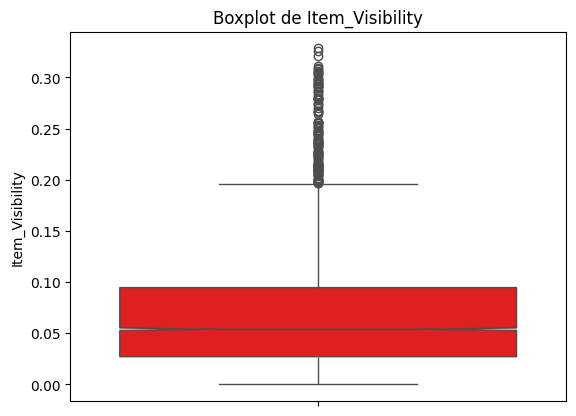

In [49]:
sns.boxplot(y='Item_Visibility', data=df, color='r', notch=True)
plt.title('Boxplot de Item_Visibility')

Text(0.5, 1.0, 'Boxplot de Item_MRP')

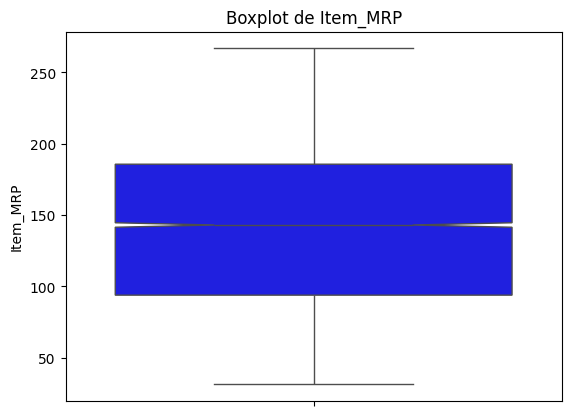

In [50]:
sns.boxplot(y='Item_MRP', data=df, color='b', notch=True)
plt.title('Boxplot de Item_MRP')

Text(0.5, 1.0, 'Boxplot de Outlet_Establishment_Year')

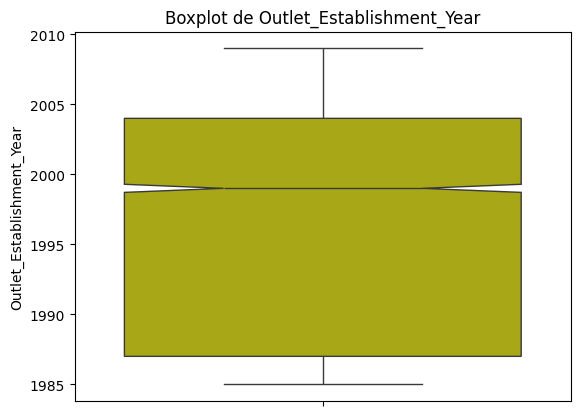

In [51]:
sns.boxplot(y='Outlet_Establishment_Year', data=df, color='y', notch=True)
plt.title('Boxplot de Outlet_Establishment_Year')

Text(0.5, 1.0, 'Boxplot de Item_Outlet_Sales')

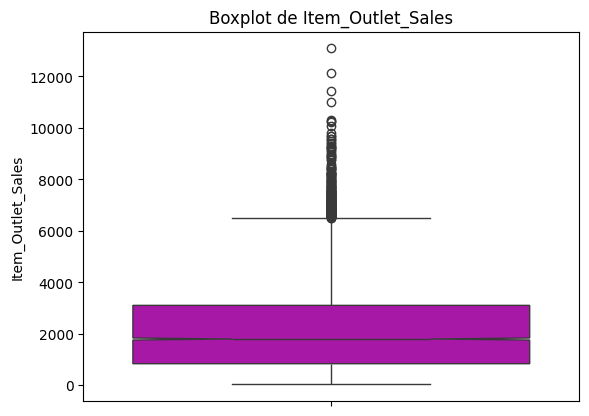

In [52]:
sns.boxplot(y='Item_Outlet_Sales', data=df, color='m', notch=True)
plt.title('Boxplot de Item_Outlet_Sales')

Mapa de calor de correlación entre las características numéricas:

In [53]:
# Fuente : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
correlacion = df.corr(numeric_only=True)

<Axes: >

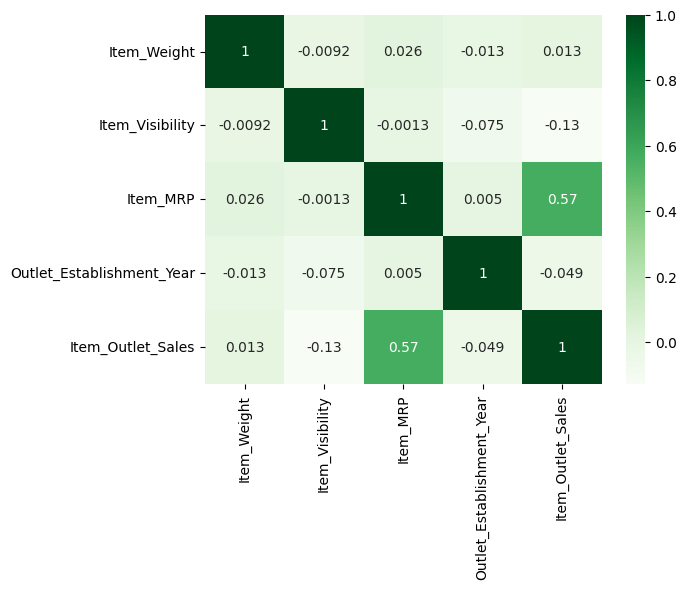

In [54]:
sns.heatmap(correlacion, cmap='Greens', annot=True)

Gráficos adicionales:

Se realizan gráficos de Item_Weight según el contenido de grasas:

Text(0.5, 1.0, 'Histogramas de Item_Weight según Fat content')

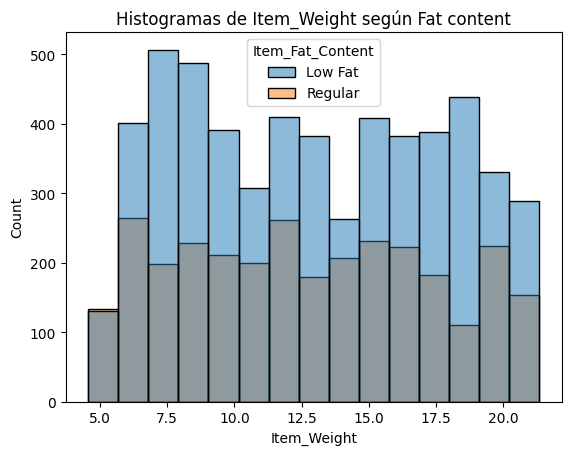

In [55]:
sns.histplot(x='Item_Weight', hue='Item_Fat_Content', data=df, bins=15)
plt.title('Histogramas de Item_Weight según Fat content')

Text(0.5, 1.0, 'Boxplot de Item_Weight según Fat content')

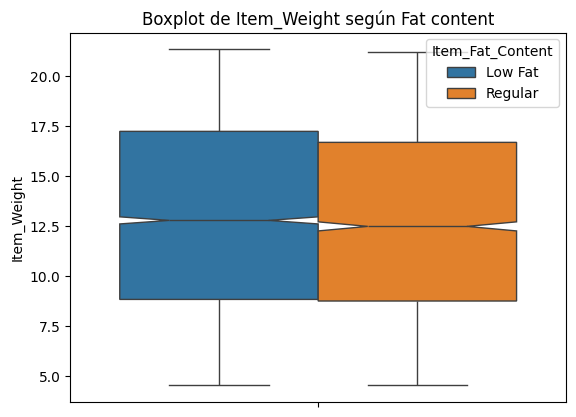

In [56]:
sns.boxplot(y='Item_Weight', data=df, hue='Item_Fat_Content', notch=True)
plt.title('Boxplot de Item_Weight según Fat content')

Se realizan gráficos de Item_Outlet_Sales según el tamaño del Outlet:

Text(0.5, 1.0, 'Histogramas de Item_Outlet_Sales según Outlet_Size')

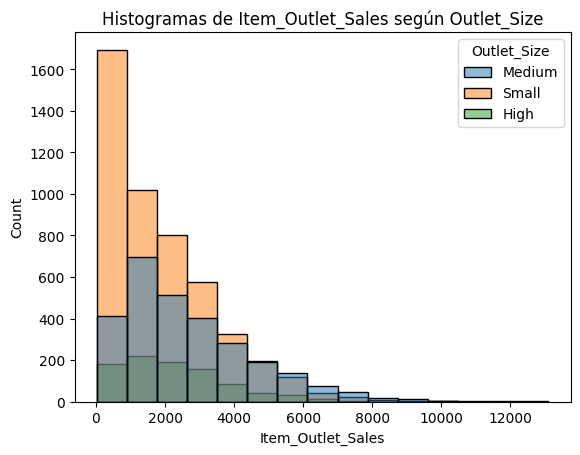

In [57]:
sns.histplot(x='Item_Outlet_Sales', hue='Outlet_Size', data=df, bins=15)
plt.title('Histogramas de Item_Outlet_Sales según Outlet_Size')

Text(0.5, 1.0, 'Boxplot de Item_Outlet_Sales según Outlet_Size')

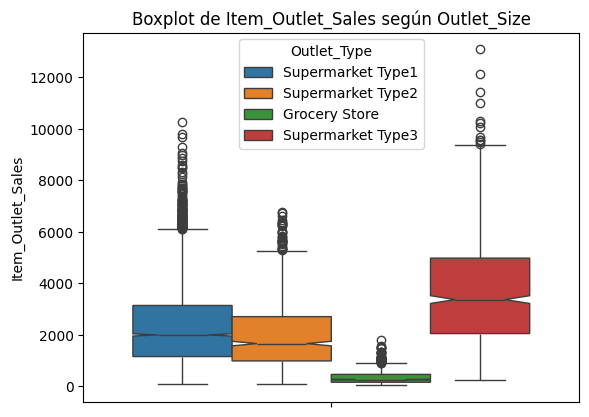

In [58]:
sns.boxplot(y='Item_Outlet_Sales', data=df, hue='Outlet_Type', notch=True)
plt.title('Boxplot de Item_Outlet_Sales según Outlet_Size')